In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [93]:
df=pd.read_csv('../Data/Global_Cybersecurity_Threats_2015-2024.csv')

In [94]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [96]:
df.duplicated().sum()

0

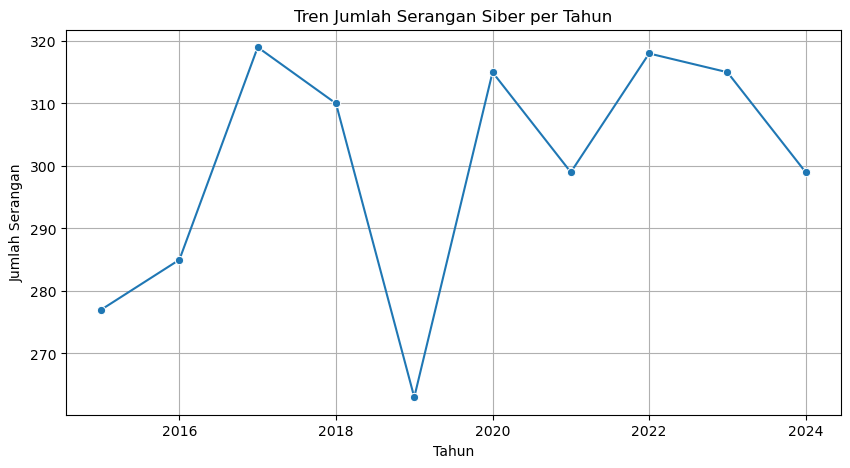

In [97]:
attack_trend = df.groupby('Year').size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=attack_trend.index, y=attack_trend.values, marker="o")
plt.title("Tren Jumlah Serangan Siber per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Serangan")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

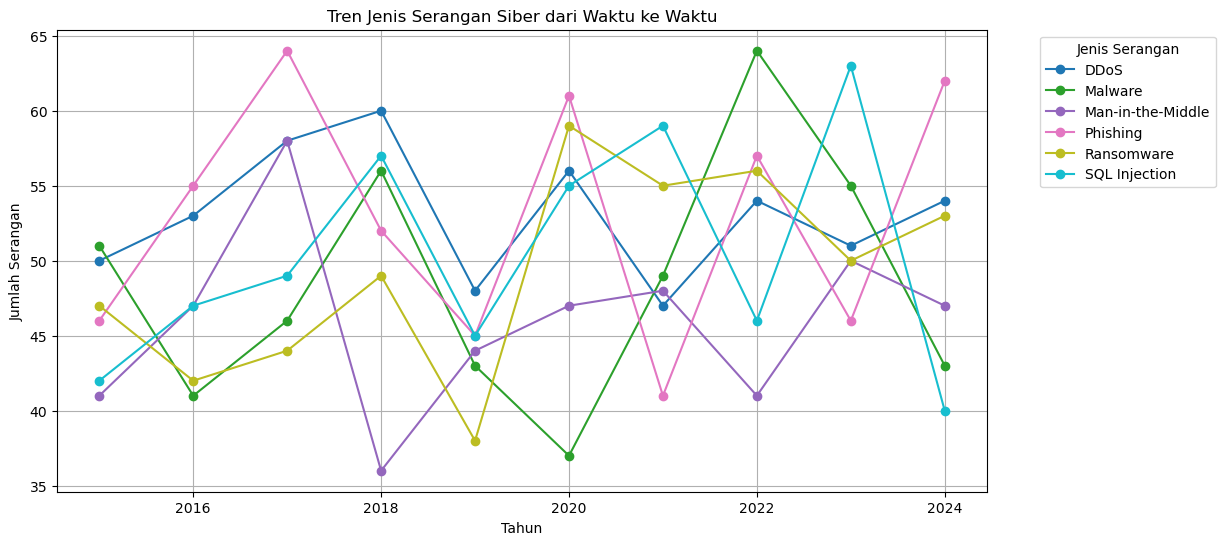

In [98]:
attack_trends = df.groupby(['Year', 'Attack Type']).size().unstack()

plt.figure(figsize=(12, 6))
attack_trends.plot(kind='line', marker='o', figsize=(12,6), colormap='tab10')
plt.title("Tren Jenis Serangan Siber dari Waktu ke Waktu")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Serangan")
plt.legend(title="Jenis Serangan", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


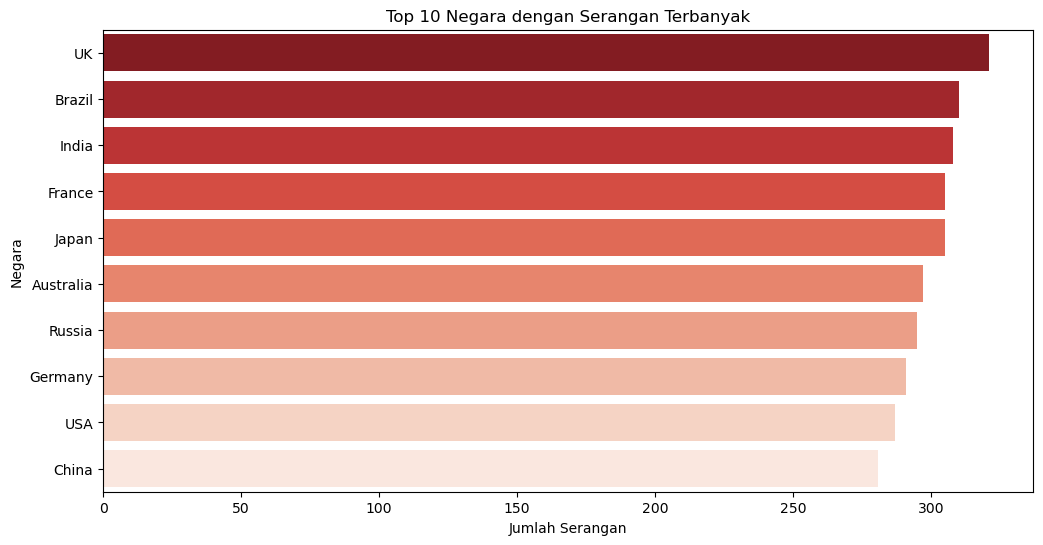

In [99]:
top_countries = df['Country'].value_counts().head(10)  # 10 negara teratas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")
plt.title("Top 10 Negara dengan Serangan Terbanyak")
plt.xlabel("Jumlah Serangan")
plt.ylabel("Negara")
plt.show()


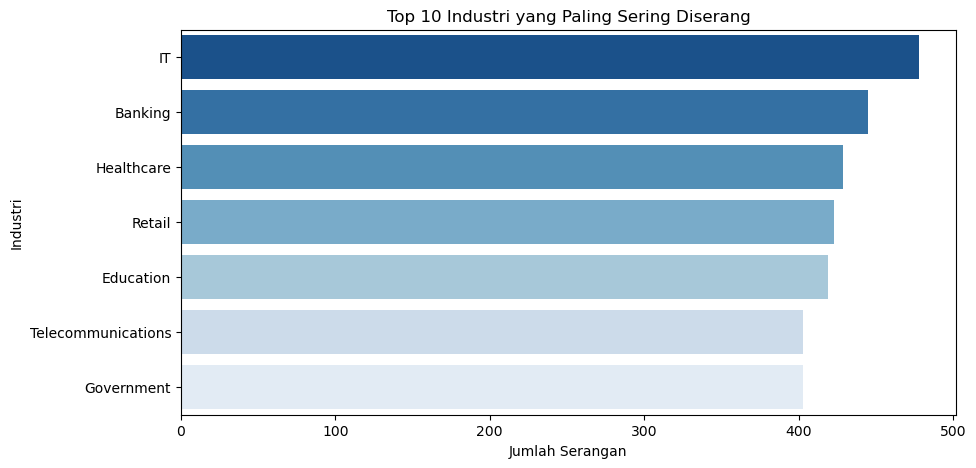

In [100]:
industry_counts = df['Target Industry'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")
plt.title("Top 10 Industri yang Paling Sering Diserang")
plt.xlabel("Jumlah Serangan")
plt.ylabel("Industri")
plt.show()

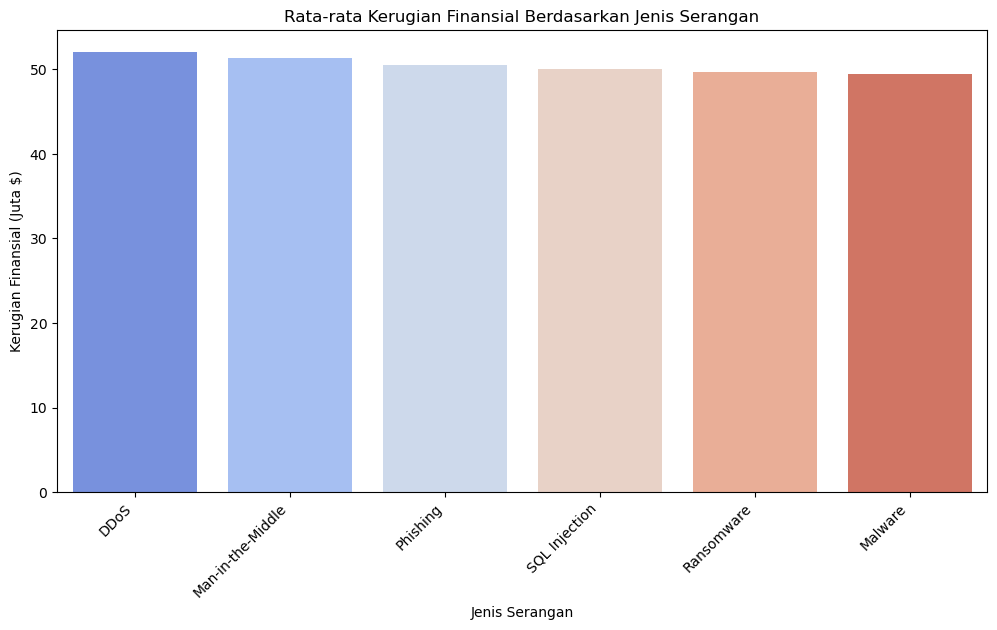

In [101]:
attack_loss = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_loss.index, y=attack_loss.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Rata-rata Kerugian Finansial Berdasarkan Jenis Serangan")
plt.xlabel("Jenis Serangan")
plt.ylabel("Kerugian Finansial (Juta $)")
plt.show()

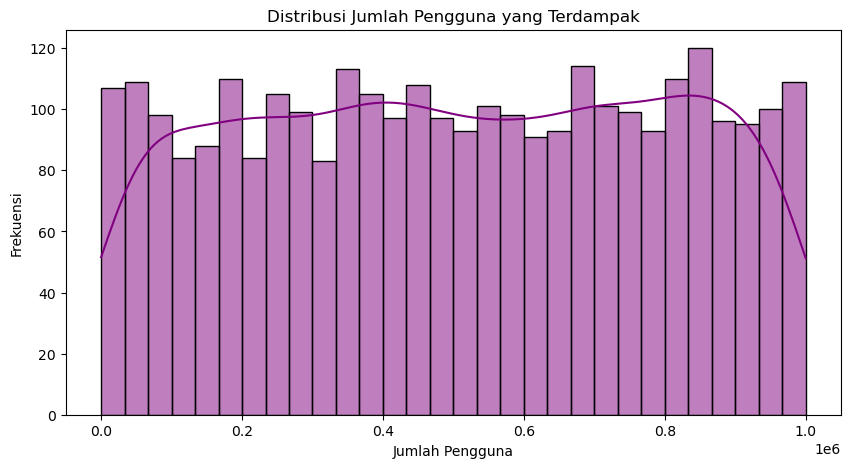

In [102]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Number of Affected Users'], bins=30, kde=True, color="purple")
plt.title("Distribusi Jumlah Pengguna yang Terdampak")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Frekuensi")
plt.show()

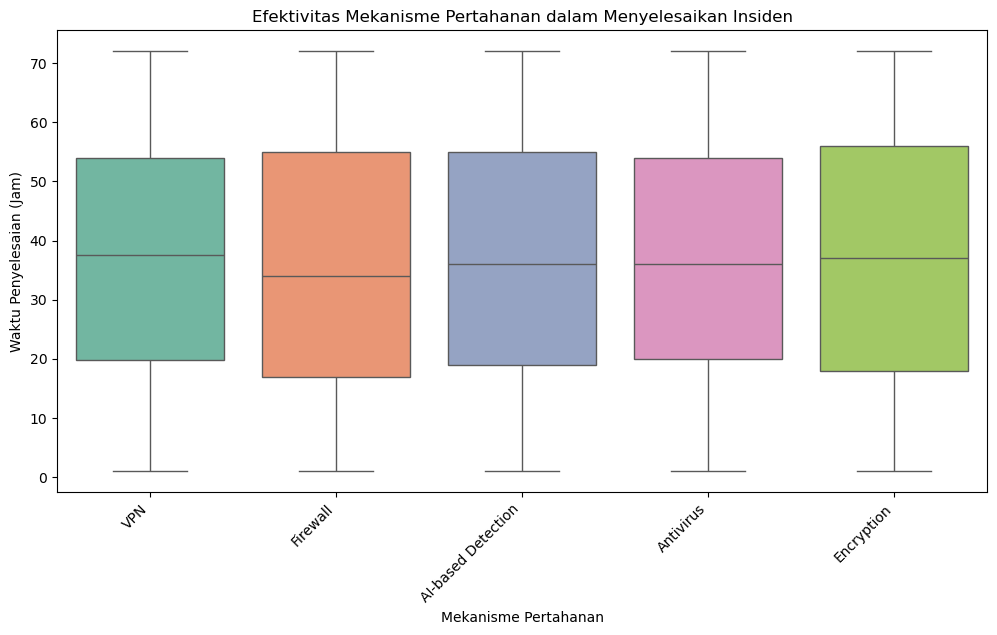

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', data=df, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Efektivitas Mekanisme Pertahanan dalam Menyelesaikan Insiden")
plt.xlabel("Mekanisme Pertahanan")
plt.ylabel("Waktu Penyelesaian (Jam)")
plt.show()

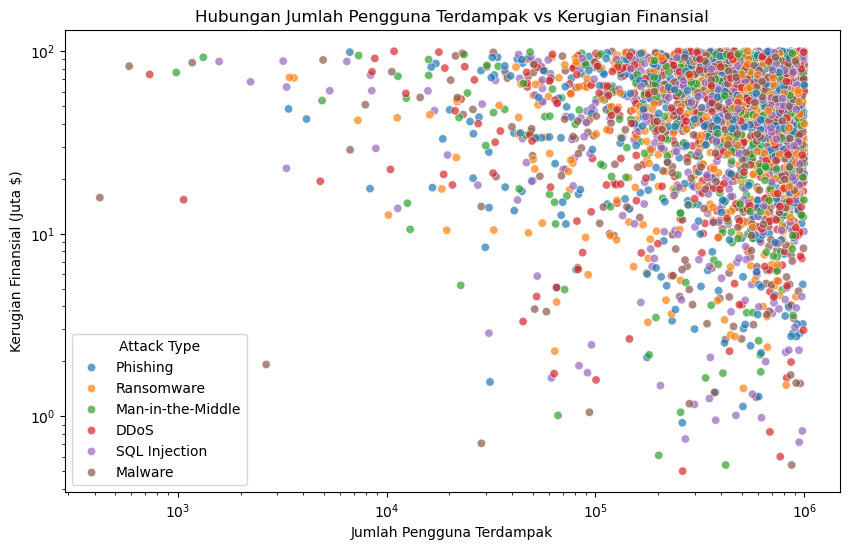

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Number of Affected Users'], y=df['Financial Loss (in Million $)'], hue=df['Attack Type'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Hubungan Jumlah Pengguna Terdampak vs Kerugian Finansial")
plt.xlabel("Jumlah Pengguna Terdampak")
plt.ylabel("Kerugian Finansial (Juta $)")
plt.show()

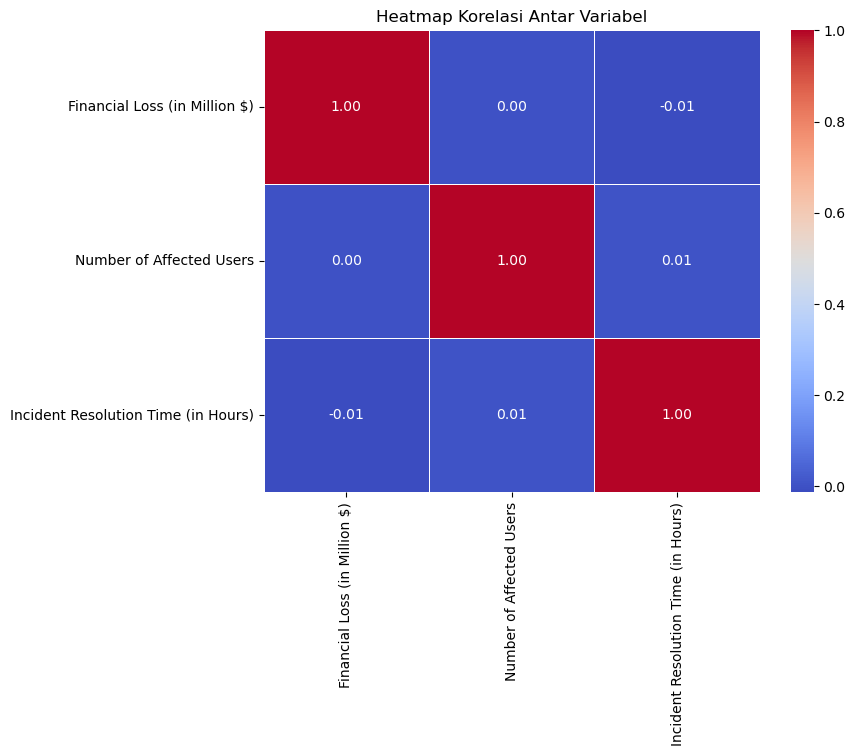

In [105]:
numeric_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
corr_matrix = df[numeric_cols].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

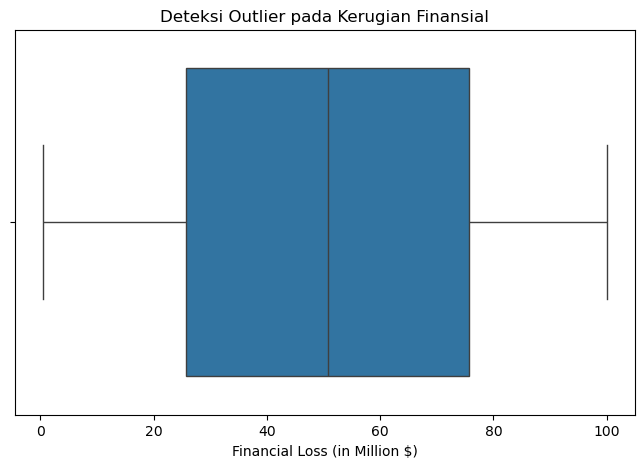

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Financial Loss (in Million $)'])
plt.title("Deteksi Outlier pada Kerugian Finansial")
plt.show()

In [107]:
outliers = df[df['Financial Loss (in Million $)'] > df['Financial Loss (in Million $)'].quantile(0.95)]
print(outliers)

        Country  Year        Attack Type     Target Industry  \
5       Germany  2017  Man-in-the-Middle              Retail   
33        Japan  2022           Phishing             Banking   
39       Brazil  2016               DDoS           Education   
40       Russia  2015               DDoS  Telecommunications   
41        India  2021      SQL Injection                  IT   
...         ...   ...                ...                 ...   
2909    Germany  2017               DDoS           Education   
2921  Australia  2015           Phishing             Banking   
2964        USA  2016      SQL Injection          Healthcare   
2975      Japan  2015  Man-in-the-Middle  Telecommunications   
2982    Germany  2017  Man-in-the-Middle          Healthcare   

      Financial Loss (in Million $)  Number of Affected Users Attack Source  \
5                             98.24                    285201       Unknown   
33                            98.47                    972469  Nation-sta

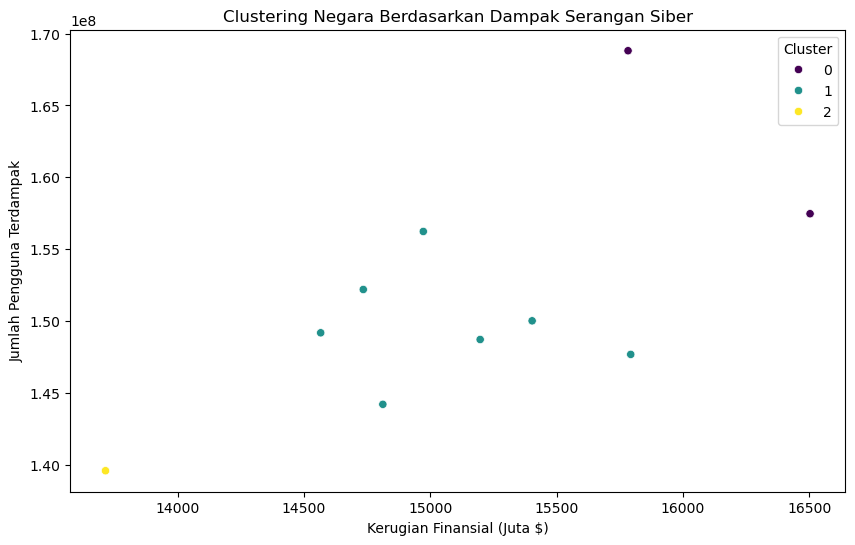

In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik
X = df.groupby('Country')[['Financial Loss (in Million $)', 'Number of Affected Users']].sum()

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Financial Loss (in Million $)'], y=X['Number of Affected Users'], hue=X['Cluster'], palette="viridis")
plt.title("Clustering Negara Berdasarkan Dampak Serangan Siber")
plt.xlabel("Kerugian Finansial (Juta $)")
plt.ylabel("Jumlah Pengguna Terdampak")
plt.show()


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode fitur kategori menjadi angka
encoder = LabelEncoder()
df['Attack Type Encoded'] = encoder.fit_transform(df['Attack Type'])

# Pilih fitur yang akan digunakan sebagai input
X = df[['Number of Affected Users', 'Incident Resolution Time (in Hours)']]
y = df['Attack Type Encoded']

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
from sklearn.preprocessing import OneHotEncoder

# Pilih fitur numerik dan kategori
X = df[['Number of Affected Users', 'Incident Resolution Time (in Hours)', 'Financial Loss (in Million $)', 'Attack Source', 'Security Vulnerability Type']]

# One-Hot Encoding untuk fitur kategori
X = pd.get_dummies(X, columns=['Attack Source', 'Security Vulnerability Type'])

# Target (Label)
y = df['Attack Type Encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Daftar model & hyperparameter yang akan diuji
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10],  # Regularization parameter
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 6, 9],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    }
}

# Simpan hasil tuning
best_models = {}

for name, cfg in param_grids.items():
    print(f"\n🔍 Tuning {name}...")
    
    grid_search = GridSearchCV(cfg["model"], cfg["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = {
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_
    }

    print(f"✅ {name} - Best Accuracy: {grid_search.best_score_:.4f}")
    print(f"   Best Parameters: {grid_search.best_params_}")

# Menampilkan model terbaik berdasarkan akurasi
best_model_name = max(best_models, key=lambda x: best_models[x]["best_score"])
print(f"\n🎯 Model terbaik setelah tuning: {best_model_name} dengan akurasi {best_models[best_model_name]['best_score']:.4f}")



🔍 Tuning Logistic Regression...
✅ Logistic Regression - Best Accuracy: 0.1817
   Best Parameters: {'C': 0.1, 'solver': 'liblinear'}

🔍 Tuning Random Forest...
✅ Random Forest - Best Accuracy: 0.1729
   Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

🔍 Tuning SVM...


Logistic Regression - Akurasi: 0.1483
Random Forest - Akurasi: 0.1933
SVM - Akurasi: 0.1467
XGBoost - Akurasi: 0.1933

 Model terbaik: Random Forest dengan akurasi 0.1933
